# Unit 5 - Financial Planning

In [160]:
# Initial imports
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import matplotlib.pyplot as plt 

%matplotlib inline

os.getcwd()

'/Users/adnanquaderi/Desktop/Penn/HW4'

In [161]:
# Load .env enviroment variables
load_dotenv('../penn.env')

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [162]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3
print(f"Starting Bitcoin amount is {my_btc}, and starting Ether amount is {my_eth}")



Starting Bitcoin amount is 1.2, and starting Ether amount is 5.3


In [163]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"


In [164]:
# use requests library and get function to get data in json format
btc_data = requests.get(btc_url).json()
#print(json.dumps(btc_data, indent=4))
eth_data = requests.get(eth_url).json()
#print(json.dumps(eth_data, indent=4))



In [165]:
# Fetch current BTC price
btc_price = btc_data['data']['1']['quotes']['USD']['price']

# Fetch current ETH price
eth_price = eth_data['data']['1027']['quotes']['USD']['price']

# Compute current value of my crpto
my_btc_value = btc_price*my_btc
my_eth_value = eth_price*my_eth
my_crypto_value = my_btc_value + my_eth_value

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $73264.80
The current value of your 5.3 ETH is $22866.16


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [166]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [167]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")
print(f"Alpaca APIobject: {type(alpaca)}")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>
Alpaca APIobject: <class 'alpaca_trade_api.rest.REST'>


In [168]:
#today = pd.Timetsamp("2020-07-14", tz="America/New_York").isoformat
#today

In [169]:
# Format current date as ISO format
#today = pd.Timetsamp("2020-07-14", tz="America/New_York").isoformat

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = "2021-10-27",
    end = "2021-10-27",
    limit = 1,
).df

# Preview DataFrame
df_portfolio

AGG                                     SPY  \
                             open    high     low   close   volume   open   
time                                                                        
2021-11-01 00:00:00-04:00  114.16  114.42  114.14  114.38  5757362  460.3   

                                                              
                               high    low   close    volume  
time                                                          
2021-11-01 00:00:00-04:00  460.7021  458.2  460.08  41362369

In [170]:
# Pick AGG and SPY close prices
agg_close_price = float(df_portfolio["AGG"]["close"])
spy_close_price = float(df_portfolio["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.38
Current SPY closing price: $460.08


In [171]:
# Compute the current value of shares
my_spy_value = agg_close_price*my_agg
my_agg_value = spy_close_price*my_spy
my_share_value = my_spy_value + my_agg_value

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $22876.00
The current value of your 200 AGG shares is $23004.00


### Savings Health Analysis

In [172]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
data = {'amount' : [my_crypto_value, my_share_value]}

# Create savings DataFrame
df_savings = pd.DataFrame(data, index = ['cryptos', 'shares'] )

# Display savings DataFrame
display(df_savings)

amount
cryptos  96130.961
shares   45880.000

<AxesSubplot:title={'center':'My crypto and share savings'}, ylabel='amount'>

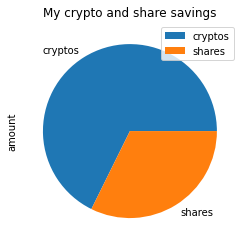

In [173]:
# Plot savings pie chart
df_savings.plot.pie(y='amount', title='My crypto and share savings')


In [174]:
# Set ideal emergency fund
emergency_fund = monthly_income * 10

# Calculate total amount of savings
total_savings = df_savings.sum()
print(f"total savings {total_savings}")

print(f"emergency_fund is {emergency_fund}, total_savings is {total_savings}")

# Validate saving health
if (emergency_fund > total_savings[1]):
    print(f"Contaratulations, you have sufficient emergency funds!")
elif emergency_fund == total_savings:
    print(f"Congratulations, you have just enough emergency funds!")
else:
    print(f"You are ${emergency_fund-total_savings} from reaching your goal.")
    


total savings amount    142010.961
dtype: float64
emergency_fund is 120000, total_savings is amount    142010.961
dtype: float64


IndexError: index 1 is out of bounds for axis 0 with size 1

## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [187]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [188]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)

# Set the ticker information
tickers = ["AGG","SPY"]

# Get 5 year's worth of historical price data
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000
).df

# Display sample data
df_stock_data.head(7)

AGG                                        \
                             open      high       low    close   volume   
time                                                                      
2017-05-11 00:00:00-04:00  108.35  108.5400  108.3435  108.515  1773499   
2017-05-12 00:00:00-04:00  108.81  108.9400  108.7800  108.920  1136553   
2017-05-15 00:00:00-04:00  108.85  108.9400  108.8200  108.890  1620264   
2017-05-16 00:00:00-04:00  108.88  109.1010  108.8800  109.000  1394153   
2017-05-17 00:00:00-04:00  109.35  109.6000  109.2800  109.560  2263851   
2017-05-18 00:00:00-04:00  109.54  109.6299  109.4433  109.550  1873534   
2017-05-19 00:00:00-04:00  109.51  109.5350  109.3520  109.525  1345002   

                              SPY                                      
                             open    high     low    close     volume  
time                                                                   
2017-05-11 00:00:00-04:00  239.35  239.57  238.13  239.410   45435690  
2017-05-12 00:00:00-04:00  239.09  239.21  238.67  239.030   35283567  
2017-05-15 00:00:00-04:00  239.47  240.44  239.45  240.245   42230620  
2017-05-16 00:00:00-04:00  240.62  240.67  239.63  240.100   37206183  
2017-05-17 00:00:00-04:00  238.10  238.64  235.75  235.850  118613594  
2017-05-18 00:00:00-04:00  235.70  237.75  235.43  236.670   82965499  
2017-05-19 00:00:00-04:00  237.33  239.08  237.27  238.300   69366163

In [196]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_even_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.4,0.6,],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [197]:
# Printing the simulation input data
MC_even_dist.portfolio_data.head(10)

AGG                                        \
                             open      high       low    close   volume   
time                                                                      
2017-05-11 00:00:00-04:00  108.35  108.5400  108.3435  108.515  1773499   
2017-05-12 00:00:00-04:00  108.81  108.9400  108.7800  108.920  1136553   
2017-05-15 00:00:00-04:00  108.85  108.9400  108.8200  108.890  1620264   
2017-05-16 00:00:00-04:00  108.88  109.1010  108.8800  109.000  1394153   
2017-05-17 00:00:00-04:00  109.35  109.6000  109.2800  109.560  2263851   
2017-05-18 00:00:00-04:00  109.54  109.6299  109.4433  109.550  1873534   
2017-05-19 00:00:00-04:00  109.51  109.5350  109.3520  109.525  1345002   
2017-05-22 00:00:00-04:00  109.43  109.4800  109.4000  109.440  1199164   
2017-05-23 00:00:00-04:00  109.50  109.5300  109.2100  109.240  1194872   
2017-05-24 00:00:00-04:00  109.25  109.5000  109.2115  109.450  2325960   

                                           SPY                           \
                          daily_return    open    high     low    close   
time                                                                      
2017-05-11 00:00:00-04:00          NaN  239.35  239.57  238.13  239.410   
2017-05-12 00:00:00-04:00     0.003732  239.09  239.21  238.67  239.030   
2017-05-15 00:00:00-04:00    -0.000275  239.47  240.44  239.45  240.245   
2017-05-16 00:00:00-04:00     0.001010  240.62  240.67  239.63  240.100   
2017-05-17 00:00:00-04:00     0.005138  238.10  238.64  235.75  235.850   
2017-05-18 00:00:00-04:00    -0.000091  235.70  237.75  235.43  236.670   
2017-05-19 00:00:00-04:00    -0.000228  237.33  239.08  237.27  238.300   
2017-05-22 00:00:00-04:00    -0.000776  238.90  239.71  238.82  239.530   
2017-05-23 00:00:00-04:00    -0.001827  239.95  240.24  239.51  240.020   
2017-05-24 00:00:00-04:00     0.001922  240.32  240.73  239.93  240.590   

                                                   
                              volume daily_return  
time                                               
2017-05-11 00:00:00-04:00   45435690          NaN  
2017-05-12 00:00:00-04:00   35283567    -0.001587  
2017-05-15 00:00:00-04:00   42230620     0.005083  
2017-05-16 00:00:00-04:00   37206183    -0.000604  
2017-05-17 00:00:00-04:00  118613594    -0.017701  
2017-05-18 00:00:00-04:00   82965499     0.003477  
2017-05-19 00:00:00-04:00   69366163     0.006887  
2017-05-22 00:00:00-04:00   37630972     0.005162  
2017-05-23 00:00:00-04:00   36771135     0.002046  
2017-05-24 00:00:00-04:00   37423590     0.002375

In [198]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/adnanquaderi/Desktop/Penn/HW4/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

0          1          2         3          4         5    \
0      1.000000   1.000000   1.000000  1.000000   1.000000  1.000000   
1      0.993588   0.999197   1.000812  0.993769   1.007632  0.984613   
2      0.993949   1.006135   1.015736  0.979838   1.017488  0.980012   
3      0.989994   1.006020   1.014067  0.990720   1.020608  0.980140   
4      0.981421   1.018405   1.016681  0.995642   1.012890  0.968441   
...         ...        ...        ...       ...        ...       ...   
7556  11.578094  12.645830  24.857974  4.850545  20.949371  4.506735   
7557  11.626481  12.741549  24.921914  4.888791  20.864025  4.504457   
7558  11.512646  12.976377  25.153558  4.868002  20.756275  4.580146   
7559  11.599887  12.974788  25.278247  4.892358  20.860416  4.602250   
7560  11.570084  12.916465  25.082853  4.881598  20.959527  4.537635   

           6          7         8          9    ...       490        491  \
0     1.000000   1.000000  1.000000   1.000000  ...  1.000000   1.000000   
1     0.992294   0.992838  0.998728   0.998608  ...  0.992052   1.006661   
2     0.990885   1.003912  0.990695   0.984696  ...  0.986829   0.999820   
3     0.981659   1.009015  0.989072   0.986723  ...  1.003501   1.017900   
4     0.988720   1.003569  0.980766   0.982994  ...  1.018633   1.005329   
...        ...        ...       ...        ...  ...       ...        ...   
7556  6.168715  20.060125  9.091094  29.501095  ...  3.435272  13.158945   
7557  6.044456  19.636876  9.077128  29.235666  ...  3.474149  13.261857   
7558  5.964483  19.349648  9.159161  29.310151  ...  3.456823  13.250881   
7559  5.961935  19.472862  9.124288  29.372003  ...  3.443261  13.272959   
7560  5.911460  19.365443  9.140192  29.654640  ...  3.444921  13.274817   

            492        493        494        495        496        497  \
0      1.000000   1.000000   1.000000   1.000000   1.000000   1.000000   
1      1.009574   1.004736   1.007674   0.995945   1.003563   0.988526   
2      1.012895   1.008190   1.004943   0.989568   1.012056   0.984698   
3      1.017664   1.008758   1.007021   0.991806   1.019456   0.980845   
4      1.012302   1.017450   1.009116   0.987292   1.025733   0.994137   
...         ...        ...        ...        ...        ...        ...   
7556  11.807020  31.463432  20.022306  28.106413  34.777736  40.024559   
7557  11.818925  30.904197  20.020116  27.825371  34.847892  40.267919   
7558  11.856185  30.744343  19.943124  27.655316  34.973735  40.171973   
7559  11.838536  30.515394  20.072200  27.633254  35.233190  40.141713   
7560  11.753983  30.411333  20.006783  27.484449  35.192345  40.299904   

            498        499  
0      1.000000   1.000000  
1      1.008554   1.006718  
2      1.000002   0.996750  
3      0.997087   1.021144  
4      0.998015   1.026360  
...         ...        ...  
7556  18.298604  39.107931  
7557  18.193375  39.071998  
7558  18.181797  39.256805  
7559  17.966184  38.977740  
7560  17.974143  38.824444  

[7561 rows x 500 columns]

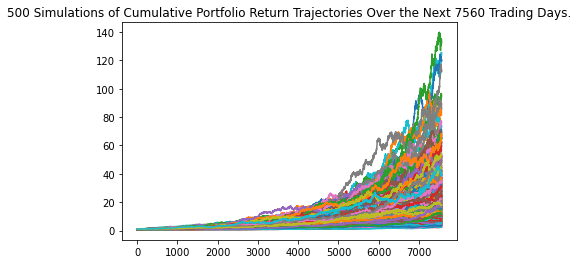

In [199]:
# Plot simulation outcomes
line_plot = MC_even_dist.plot_simulation()

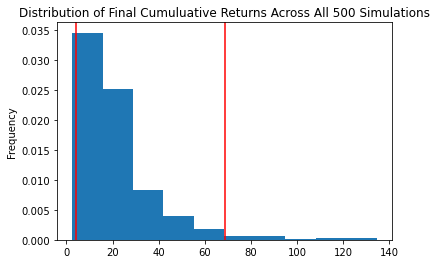

In [200]:
# Plot probability distribution and confidence intervals
dist_plot = MC_even_dist.plot_distribution()

### Retirement Analysis

In [201]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl = MC_even_dist.summarize_cumulative_return()

# Print summary statistics
print(even_tbl)

count           500.000000
mean             21.988284
std              17.983806
min               2.461818
25%              10.600616
50%              16.661357
75%              26.818449
max             134.418117
95% CI Lower      4.133837
95% CI Upper     68.697402
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [204]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(even_tbl[8]*initial_investment,2)
ci_upper = round(even_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $82676.75 and $1373948.04


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [205]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(even_tbl[8]*initial_investment,2)
ci_upper = round(even_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $124015.12 and $2060922.05


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [207]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_even_dist_2 = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.1,0.9,],
    num_simulation = 500,
    num_trading_days = 252*5
)

# Printing the simulation input data
MC_even_dist_2.portfolio_data.head(7)

AGG                                        \
                             open      high       low    close   volume   
time                                                                      
2017-05-11 00:00:00-04:00  108.35  108.5400  108.3435  108.515  1773499   
2017-05-12 00:00:00-04:00  108.81  108.9400  108.7800  108.920  1136553   
2017-05-15 00:00:00-04:00  108.85  108.9400  108.8200  108.890  1620264   
2017-05-16 00:00:00-04:00  108.88  109.1010  108.8800  109.000  1394153   
2017-05-17 00:00:00-04:00  109.35  109.6000  109.2800  109.560  2263851   
2017-05-18 00:00:00-04:00  109.54  109.6299  109.4433  109.550  1873534   
2017-05-19 00:00:00-04:00  109.51  109.5350  109.3520  109.525  1345002   

                                           SPY                           \
                          daily_return    open    high     low    close   
time                                                                      
2017-05-11 00:00:00-04:00          NaN  239.35  239.57  238.13  239.410   
2017-05-12 00:00:00-04:00     0.003732  239.09  239.21  238.67  239.030   
2017-05-15 00:00:00-04:00    -0.000275  239.47  240.44  239.45  240.245   
2017-05-16 00:00:00-04:00     0.001010  240.62  240.67  239.63  240.100   
2017-05-17 00:00:00-04:00     0.005138  238.10  238.64  235.75  235.850   
2017-05-18 00:00:00-04:00    -0.000091  235.70  237.75  235.43  236.670   
2017-05-19 00:00:00-04:00    -0.000228  237.33  239.08  237.27  238.300   

                                                   
                              volume daily_return  
time                                               
2017-05-11 00:00:00-04:00   45435690          NaN  
2017-05-12 00:00:00-04:00   35283567    -0.001587  
2017-05-15 00:00:00-04:00   42230620     0.005083  
2017-05-16 00:00:00-04:00   37206183    -0.000604  
2017-05-17 00:00:00-04:00  118613594    -0.017701  
2017-05-18 00:00:00-04:00   82965499     0.003477  
2017-05-19 00:00:00-04:00   69366163     0.006887

In [208]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_even_dist_2.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/adnanquaderi/Desktop/Penn/HW4/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     0.997376  0.995697  0.995734  1.023781  1.005664  1.008169  0.984339   
2     0.997106  1.007631  0.991824  1.048577  0.998744  1.026498  0.992030   
3     0.999988  1.009205  0.988476  1.056174  1.002303  1.029609  0.970046   
4     0.998924  1.008589  0.978884  1.066764  0.996670  1.033857  0.973146   
...        ...       ...       ...       ...       ...       ...       ...   
1256  1.877729  1.370054  1.288010  1.752390  1.121811  2.319023  3.735365   
1257  1.871363  1.345011  1.244473  1.772806  1.146333  2.269942  3.742094   
1258  1.870240  1.345874  1.245110  1.776146  1.149915  2.255820  3.673881   
1259  1.910532  1.336231  1.252221  1.734590  1.148641  2.260846  3.614457   
1260  1.880434  1.332205  1.228600  1.724233  1.146497  2.194129  3.528308   

           7         8         9    ...       490       491       492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     1.000799  1.003750  0.997545  ...  0.996855  0.985683  1.011151   
2     1.000453  1.017934  1.008055  ...  0.987404  0.983887  0.998921   
3     0.987376  0.988664  1.014994  ...  0.985646  1.000233  0.982897   
4     0.981417  0.985909  0.991271  ...  0.995394  1.002777  0.983445   
...        ...       ...       ...  ...       ...       ...       ...   
1256  2.761875  1.280852  1.338236  ...  1.284738  2.803837  1.984559   
1257  2.754290  1.278743  1.326536  ...  1.280458  2.796351  1.962634   
1258  2.769120  1.264364  1.335217  ...  1.286557  2.748048  1.986044   
1259  2.733051  1.257327  1.338217  ...  1.269298  2.734166  1.963370   
1260  2.773843  1.261002  1.325318  ...  1.242584  2.749129  1.964160   

           493       494       495       496       497       498       499  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     1.002090  1.014805  0.985496  1.001712  1.019539  0.998825  1.009002  
2     0.978133  0.991497  0.996881  1.019373  1.011192  1.012549  1.009787  
3     0.991284  0.966771  1.007751  1.028094  1.023852  1.019559  1.009017  
4     1.000243  0.971351  1.013774  1.051411  1.029389  1.015891  1.016548  
...        ...       ...       ...       ...       ...       ...       ...  
1256  1.510901  2.457636  0.989543  1.308248  0.903972  2.601544  1.364718  
1257  1.487809  2.428976  0.981879  1.322422  0.919975  2.615400  1.375979  
1258  1.501876  2.433038  1.005676  1.306115  0.911902  2.580386  1.368784  
1259  1.492848  2.436379  1.014913  1.297323  0.906918  2.597295  1.392630  
1260  1.487976  2.464535  1.008329  1.297693  0.893042  2.607976  1.404001  

[1261 rows x 500 columns]

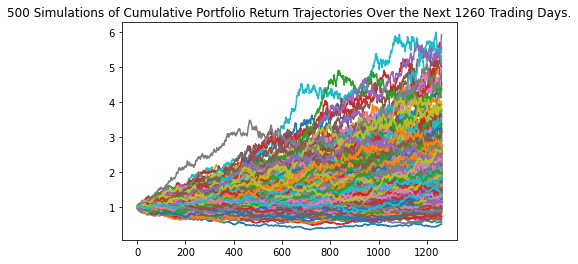

In [210]:
# Plot simulation outcomes
line_plot = MC_even_dist_2.plot_simulation()

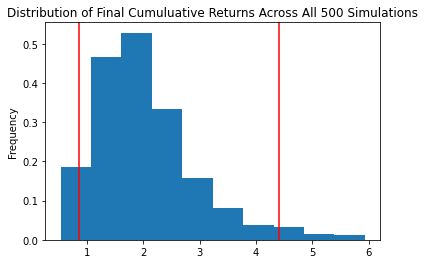

In [211]:
# Plot probability distribution and confidence intervals
dist_plot = MC_even_dist_2.plot_distribution()

In [212]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl_2 = MC_even_dist_2.summarize_cumulative_return()

# Print summary statistics
print(even_tbl_2)

count           500.000000
mean              2.048572
std               0.892800
min               0.527968
25%               1.426342
50%               1.901442
75%               2.466332
max               5.935181
95% CI Lower      0.853049
95% CI Upper      4.402728
Name: 1260, dtype: float64


In [224]:
# Set initial investment
initial_investment_2 = 20000 * 3

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower_2 = round(even_tbl_2[8]*initial_investment_2,2)
ci_upper_2 = round(even_tbl_2[9]*initial_investment_2,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_2} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_2} and ${ci_upper_2}")


There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $51182.97 and $264163.66


### Ten Years Retirement Option

In [225]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_even_dist_3 = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.2,0.8,],
    num_simulation = 500,
    num_trading_days = 252*10
)

# Printing the simulation input data
MC_even_dist_3.portfolio_data.head(7)

AGG                                        \
                             open      high       low    close   volume   
time                                                                      
2017-05-11 00:00:00-04:00  108.35  108.5400  108.3435  108.515  1773499   
2017-05-12 00:00:00-04:00  108.81  108.9400  108.7800  108.920  1136553   
2017-05-15 00:00:00-04:00  108.85  108.9400  108.8200  108.890  1620264   
2017-05-16 00:00:00-04:00  108.88  109.1010  108.8800  109.000  1394153   
2017-05-17 00:00:00-04:00  109.35  109.6000  109.2800  109.560  2263851   
2017-05-18 00:00:00-04:00  109.54  109.6299  109.4433  109.550  1873534   
2017-05-19 00:00:00-04:00  109.51  109.5350  109.3520  109.525  1345002   

                                           SPY                           \
                          daily_return    open    high     low    close   
time                                                                      
2017-05-11 00:00:00-04:00          NaN  239.35  239.57  238.13  239.410   
2017-05-12 00:00:00-04:00     0.003732  239.09  239.21  238.67  239.030   
2017-05-15 00:00:00-04:00    -0.000275  239.47  240.44  239.45  240.245   
2017-05-16 00:00:00-04:00     0.001010  240.62  240.67  239.63  240.100   
2017-05-17 00:00:00-04:00     0.005138  238.10  238.64  235.75  235.850   
2017-05-18 00:00:00-04:00    -0.000091  235.70  237.75  235.43  236.670   
2017-05-19 00:00:00-04:00    -0.000228  237.33  239.08  237.27  238.300   

                                                   
                              volume daily_return  
time                                               
2017-05-11 00:00:00-04:00   45435690          NaN  
2017-05-12 00:00:00-04:00   35283567    -0.001587  
2017-05-15 00:00:00-04:00   42230620     0.005083  
2017-05-16 00:00:00-04:00   37206183    -0.000604  
2017-05-17 00:00:00-04:00  118613594    -0.017701  
2017-05-18 00:00:00-04:00   82965499     0.003477  
2017-05-19 00:00:00-04:00   69366163     0.006887

In [226]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_even_dist_3.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/adnanquaderi/Desktop/Penn/HW4/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     0.993324  0.990793  0.999702  1.002429  0.992014  0.984752  1.010853   
2     0.984283  0.978374  0.988857  1.000245  0.990843  1.002478  0.997259   
3     0.994598  0.979579  0.988616  0.992492  0.991413  1.011678  1.005183   
4     1.006356  0.971370  0.982462  0.991940  1.001396  1.009364  0.994461   
...        ...       ...       ...       ...       ...       ...       ...   
2516  1.013133  2.954968  2.346021  6.335637  4.872980  2.110088  1.697117   
2517  0.999044  2.933864  2.365253  6.329005  4.766716  2.069413  1.665221   
2518  1.000742  2.900603  2.393333  6.406638  4.812654  2.046971  1.671078   
2519  0.997731  2.896739  2.379900  6.461132  4.766434  2.020918  1.668665   
2520  1.012408  2.894216  2.362256  6.423920  4.819402  2.007477  1.684482   

           7         8         9    ...       490       491       492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     1.000320  1.004662  1.002838  ...  0.995790  1.001353  0.998466   
2     1.010474  0.991670  0.970857  ...  0.988978  1.012727  0.992183   
3     1.006060  0.985405  0.973775  ...  0.998231  1.024449  0.998210   
4     1.001340  0.989552  0.965669  ...  1.014498  1.018461  0.989038   
...        ...       ...       ...  ...       ...       ...       ...   
2516  1.298905  2.481202  2.201813  ...  2.200946  2.189665  3.727381   
2517  1.309446  2.486552  2.228645  ...  2.180021  2.169826  3.719868   
2518  1.313387  2.477712  2.213644  ...  2.190114  2.127919  3.660223   
2519  1.302513  2.497621  2.161664  ...  2.161788  2.115754  3.713859   
2520  1.318634  2.501538  2.135491  ...  2.152380  2.155396  3.721674   

           493       494       495       496       497       498       499  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     0.983120  1.005455  0.980993  1.000156  1.021180  1.010803  0.997785  
2     0.953369  1.003918  0.990102  0.985549  1.018084  1.024854  0.988426  
3     0.950838  1.015691  1.011997  0.992590  1.020563  1.007403  1.012177  
4     0.946390  1.032823  1.017090  0.999807  1.031193  1.030434  1.015138  
...        ...       ...       ...       ...       ...       ...       ...  
2516  9.600627  5.348497  3.146281  6.849820  0.736082  2.469081  1.828422  
2517  9.544629  5.301251  3.226007  7.043887  0.734626  2.462047  1.819858  
2518  9.583631  5.227280  3.226688  6.893599  0.740213  2.462919  1.812510  
2519  9.632608  5.284823  3.221278  6.901450  0.742334  2.466701  1.828602  
2520  9.481540  5.225185  3.207243  6.956923  0.733142  2.480521  1.829851  

[2521 rows x 500 columns]

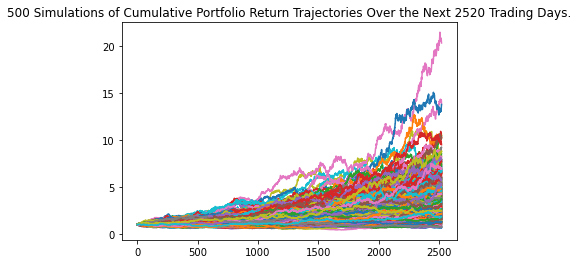

In [227]:
# Plot simulation outcomes
line_plot = MC_even_dist_3.plot_simulation()

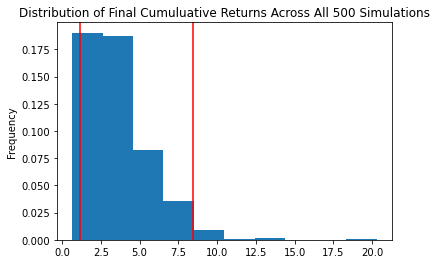

In [228]:
# Plot probability distribution and confidence intervals
dist_plot = MC_even_dist_3.plot_distribution()

In [229]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl_3 = MC_even_dist_3.summarize_cumulative_return()

# Print summary statistics
print(even_tbl_3)

count           500.000000
mean              3.667882
std               2.127251
min               0.647183
25%               2.184949
50%               3.191834
75%               4.624253
max              20.289689
95% CI Lower      1.143996
95% CI Upper      8.420756
Name: 2520, dtype: float64


In [230]:
# Set initial investment
initial_investment_3 = 20000 * 2


# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower_3 = round(even_tbl_3[8]*initial_investment,2)
ci_upper_3 = round(even_tbl_3[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_3} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_3} and ${ci_upper_3}")

There is a 95% chance that an initial investment of $40000 in the portfolio over the next 10 years will end within in the range of $45759.84 and $336830.23
